<a href="https://www.kaggle.com/code/pumpkin18/customer-segmentation-for-beginners-using-kmeans?scriptVersionId=121094138" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p align="center">
  <img src="https://media.giphy.com/media/5zf2M4HgjjWszLd4a5/giphy.gif" alt="animated" />
</p>
<!-- <audio controls src="http://commondatastorage.googleapis.com/codeskulptor-demos/DDR_assets/Sevish_-__nbsp_.mp3" loop autoplay></audio> -->

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Import Libraries
    </h2>
</div>

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

/kaggle/input/mall-customers/Mall_Customers.csv


<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Data Preprocessing
    </h2>
</div>

In [12]:
df=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Finding number of rows and columns
print("Number of rows and columns: {}".format(df.shape))

Number of rows and columns: (200, 5)


In [14]:
##Getting some information about the dataset
print("Inforamtion about attributes\n")
print(df.info())

Inforamtion about attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [15]:
# Checking for missing values
print("Number of missing values in each attribute:\n")
print(df.isnull().sum())

Number of missing values in each attribute:

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [16]:
# Choosing the annual income and spending score column
X=df.iloc[:,[3,4]].values
print(X[1:10])

[[15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">KMeans Model
    </h2>
</div>

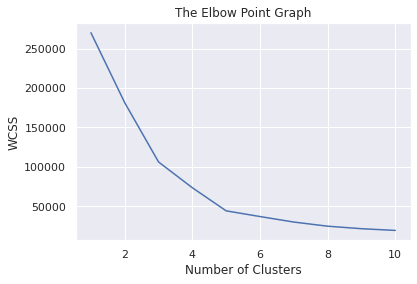

In [17]:
## Choosing Number of Clusters
## We use wcss parameter in elbow method
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)
##Plot elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

<p>Optimal Number of clusters is 5<br /> Training the K-means Clustering Model with number of clusters = 5</p>

In [18]:
final_model=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=final_model.fit_predict(X)


<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Plotting Number of Clusters Formed
    </h2>
</div>


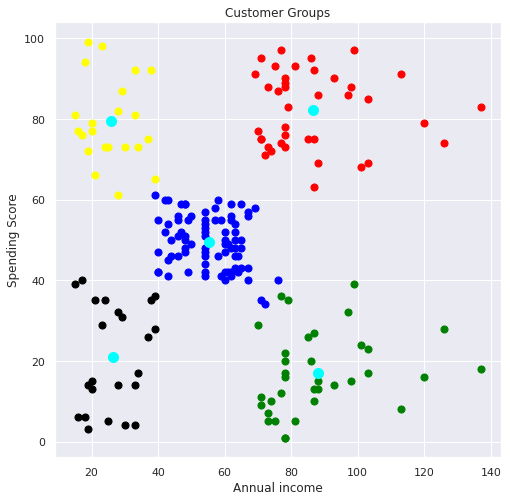

In [19]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0,],X[Y==0,1],s=50,c='green',label="Cluster 1")
plt.scatter(X[Y==1,0,],X[Y==1,1],s=50,c='blue',label="Cluster 2")
plt.scatter(X[Y==2,0,],X[Y==2,1],s=50,c='red',label="Cluster 3")
plt.scatter(X[Y==3,0,],X[Y==3,1],s=50,c='yellow',label="Cluster 4")
plt.scatter(X[Y==4,0,],X[Y==4,1],s=50,c='black',label="Cluster 5")


#plot the centroids
plt.scatter(final_model.cluster_centers_[:,0],final_model.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title("Customer Groups")
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.show()

<img src="https://media.tenor.com/WrG5Ar-qk5QAAAAC/upvote-give-this-man.gif">